In [18]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models


import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [19]:
(x_train, _), (x_test, _) = mnist.load_data()

In [20]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [27]:
input_dim = x_train.shape[1]   # 784
latent_dim = 2                 # you can change this

# Encoder
input_img = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
latent = layers.Dense(latent_dim, activation='relu', name="latent_space")(encoded)

# Decoder
decoded = layers.Dense(64, activation='relu')(latent)
decoded = layers.Dense(128, activation='relu')(decoded)
output_img = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mse')


In [30]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0755 - val_loss: 0.0573
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0550 - val_loss: 0.0528
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0519 - val_loss: 0.0508
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0500 - val_loss: 0.0489
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0479 - val_loss: 0.0470
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0463 - val_loss: 0.0457
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0451 - val_loss: 0.0449
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0443 - val_loss: 0.0442
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0437 - val_loss: 0.0436
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0431 - val_loss: 0.0432


In [32]:
test_loss = autoencoder.evaluate(x_test, x_test)
print("Test Loss (MSE):", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0432 
Test Loss (MSE): 0.043151382356882095


In [33]:
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_space (Dense)            │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 655,544 (2.50 MB)

 Trainable params: 218,514 (853.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,030 (1.67 MB)

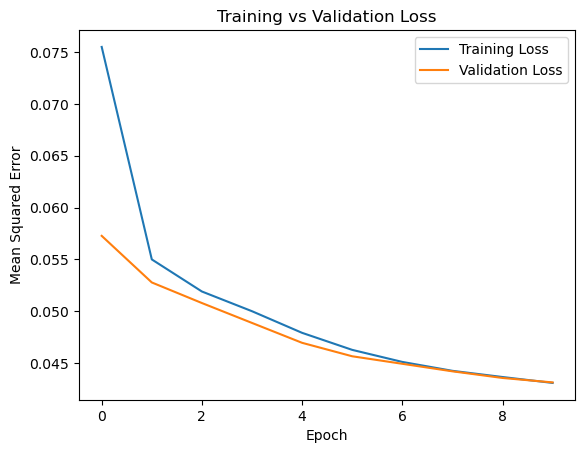

In [34]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


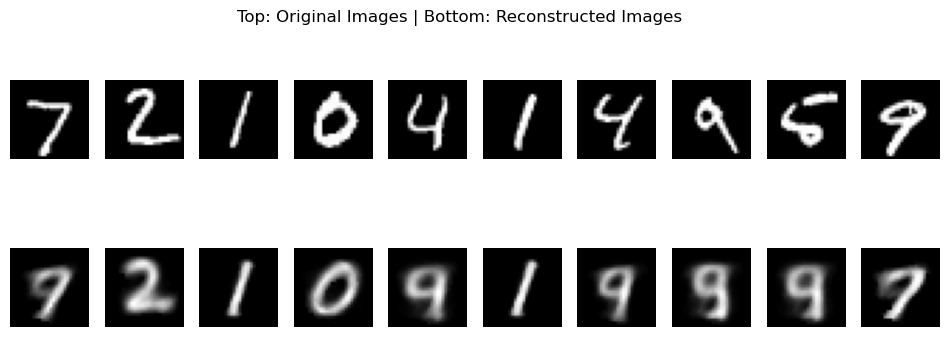

In [36]:
import numpy as np

reconstructed_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(12, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle('Top: Original Images | Bottom: Reconstructed Images')
plt.show()


The autoencoder was successfully trained on the MNIST dataset to reconstruct handwritten digit images. The training and validation loss curves show a steady decrease over epochs. From comparison of original and reconstructed images, it is clear that the autoencoder is able to preserve the overall structure and shape of the digits. Although the reconstructed images appear slightly blurred, the digits remain clearly recognizable. This blurring occurs due to dimensionality reduction in the latent space, where fine pixel-level details are sacrificed to retain essential features. Overall, the results demonstrate effective image compression and reconstruction by the autoencoder.